 Cubic spline interpolation is a special case for Spline interpolation that is used very often to avoid the
problem of Runge's phenomenon. This method gives an interpolating polynomial that is smoother and
has smaller error than some other interpolating polynomials such as Lagrange polynomial and Newton
polynomial. 


In [ ]:
from typing import Tuple, List
import bisect
import matplotlib.pyplot as plt 

In [3]:
def compute_changes(x: List[float]) -> List[float]:
    return [x[i+1] - x[i] for i in range(len(x) - 1)] 

In [4]:
def create_tridiagonalmatrix(n: int, h: List[float]) -> Tuple[List[float], List[float], List[float]]:
    A = [h[i] / (h[i] + h[i + 1]) for i in range(n - 2)] + [0]
    B = [2] * n
    C = [0] + [h[i + 1] / (h[i] + h[i + 1]) for i in range(n - 2)]
    return A, B, C 

In [5]:
def create_target(n: int, h: List[float], y: List[float]):
    return [0] + [6 * ((y[i + 1] - y[i]) / h[i] - (y[i] - y[i - 1]) / h[i - 1]) / (h[i] + h[i-1]) for i in range(1, n - 1)] + [0] 

In [6]:
def solve_tridiagonalsystem(A: List[float], B: List[float], C: List[float], D: List[float]):
    c_p = C + [0]
    d_p = [0] * len(B)
    X = [0] * len(B) 
    c_p[0] = C[0] / B[0]
    d_p[0] = D[0] / B[0]
    for i in range(1, len(B)): 
        c_p[i] = c_p[i] / (B[i] - c_p[i - 1] * A[i - 1])
        d_p[i] = (D[i] - d_p[i - 1] * A[i - 1]) / (B[i] - c_p[i - 1] * A[i - 1]) 
    X[-1] = d_p[-1]
    for i in range(len(B) - 2, -1, -1):
        X[i] = d_p[i] - c_p[i] * X[i + 1] 
    return X 

In [7]:
def compute_spline(x: List[float], y: List[float]):
    n = len(x)
    if n < 3:
        raise ValueError('Too short an array')
    if n != len(y):
        raise ValueError('Array lengths are different') 
    h = compute_changes(x)
    if any(v < 0 for v in h):
        raise ValueError('X must be strictly increasing')
    A, B, C = create_tridiagonalmatrix(n, h)
    D = create_target(n, h, y)
    M = solve_tridiagonalsystem(A, B, C, D)
    coefficients = [[(M[i+1]-M[i])*h[i]*h[i]/6, M[i]*h[i]*h[i]/2, (y[i+1] - y[i] - (M[i+1]+2*M[i])*h[i]*h[i]/6),
y[i]] for i in range(n-1)] 
    def spline(val):
        idx = min(bisect.bisect(x, val)-1, n-2)
        z = (val - x[idx]) / h[idx]
        C = coefficients[idx]
        return (((C[0] * z) + C[1]) * z + C[2]) * z + C[3]
    return spline 

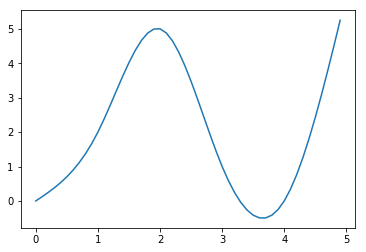

In [8]:
x_ = [0,1,2,3,4,5]
y_ = [0,2,5,1,0,6]
spline = compute_spline(x_, y_)
for i, x in enumerate(x_):
    assert abs(y_[i] - spline(x)) < 1e-8, f'Error at {x}, {y_[i]}'
x_vals = [v / 10 for v in range(0, 50, 1)]
y_vals = [spline(y) for y in x_vals]
plt.plot(x_vals, y_vals) 